### Домашнее задание №7. Продвинутая оптимизация

При фиксированном seed=21  поэкспериментируйте с параметрами алгоритма дифференциальной эволюции: strategy, popsize,tol, mutation, recombination и updating.Постройте графики количества итераций оптимизации функции Растригина от значения параметра.

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution
import numpy as np

In [69]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 17,7

In [78]:
def rastrigin(x):
    return 10*4 + np.sum(x**2 - 10*np.cos(2*np.pi*x), axis=0)

In [137]:
bounds = [(-5, 5), (-5, 5), (-5,5),(-5,5)]

1. параметр strategy

In [80]:
strategy = ['best1bin', 'best1exp', 'rand1exp', 'randtobest1exp', 'currenttobest1exp', 'best2exp', 'rand2exp', 'randtobest1bin',
'currenttobest1bin', 'best2bin', 'rand2bin', 'rand1bin']

In [90]:
res_strategy = []

for i in strategy:
    result = differential_evolution(rastrigin, bounds, seed=21, strategy=i)
    res_strategy.append(result.nit)

Text(0, 0.5, 'Количество итераций')

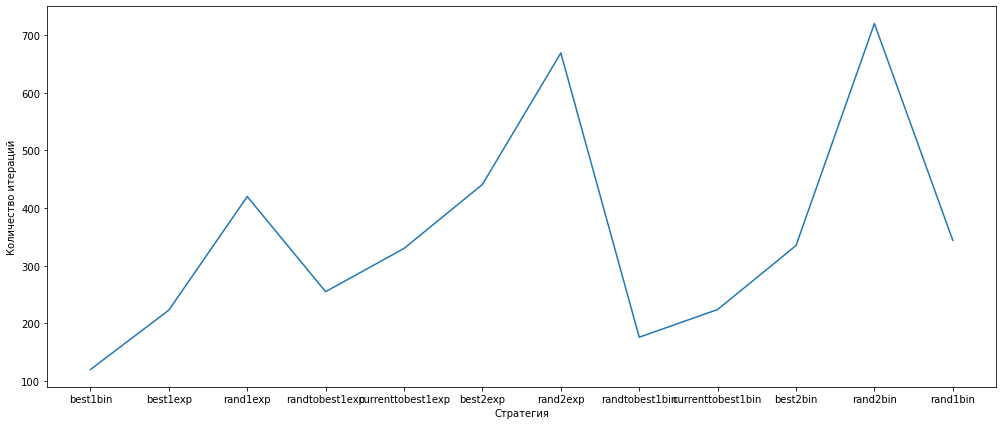

In [91]:
plt.plot(strategy, res_strategy)
plt.xlabel('Стратегия')
plt.ylabel('Количество итераций')

In [92]:
print('минимальное количество итераций соответствует стратегии:', min(zip(strategy, res_strategy)))

минимальное количество итераций соответствует стратегии: ('best1bin', 120)


2. параметр popsize

In [103]:
popsize = [10,30,50,70,90,110,130,150]

In [117]:
res_popsize = []

for i in popsize:
    result = differential_evolution(rastrigin, bounds, seed=21, strategy='best1bin',popsize=i)
    res_popsize.append(result.nit)


Text(0, 0.5, 'Количество итераций')

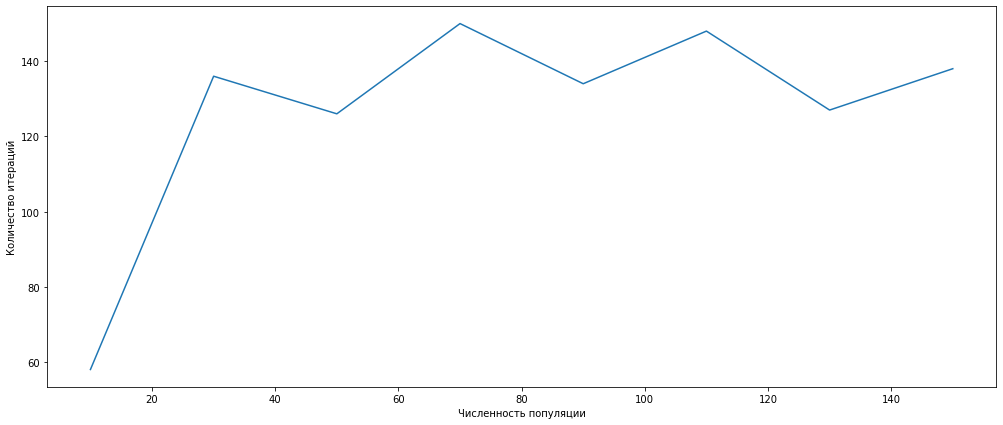

In [108]:
plt.plot(popsize, res_popsize)
plt.xlabel('Численность популяции')
plt.ylabel('Количество итераций')

In [111]:
print('минимальное количество итераций соответствует количеству популяций:', min(zip(popsize, res_popsize)))

минимальное количество итераций соответствует количеству популяций: (10, 58)


3. параметр tol

In [112]:
tol = [1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001]

In [113]:
res_tol = []

for i in tol:
    result = differential_evolution(rastrigin, bounds, seed=21, strategy='best1bin',popsize=10, tol=i)
    res_tol.append(result.nit)
    

Text(0, 0.5, 'Количество итераций')

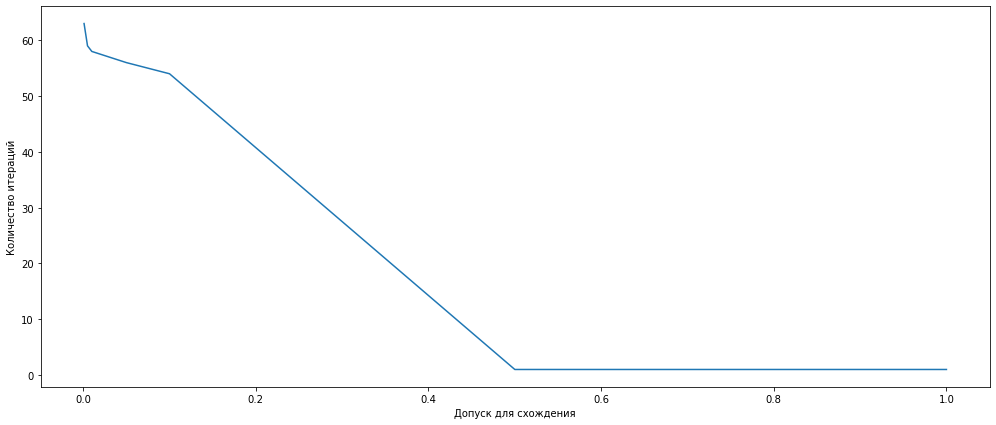

In [138]:
plt.plot(tol, res_tol)
plt.xlabel('Допуск для схождения')
plt.ylabel('Количество итераций')

Очевидно, чем точнее допуск, тем больше количество итераций, но и меньше будет получаемая точность результата

4. параметр mutation. float in the range [0, 2]

In [134]:
mutation = np.random.uniform(0,2,10)
mutation = np.sort(mutation, axis=0)
mutation

array([0.43354321, 0.69044765, 1.1232501 , 1.61424209, 1.65357829,
       1.65765221, 1.76877947, 1.77555435, 1.78349583, 1.86046673])

In [135]:
res_mutation = []

for i in mutation:
    result = differential_evolution(rastrigin, bounds, seed=21, strategy='best1bin',popsize=10, tol=0.001, mutation=i)
    res_mutation.append(result.nit)

Text(0, 0.5, 'Количество итераций')

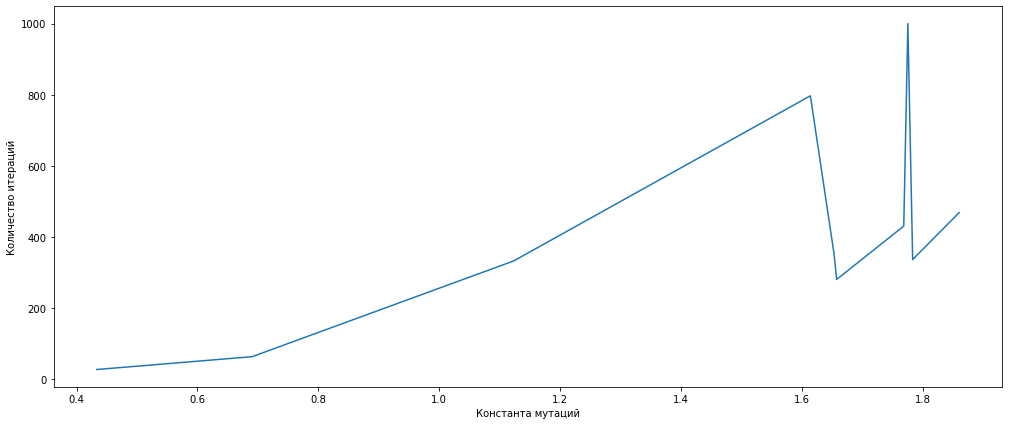

In [142]:
plt.plot(mutation, res_mutation)
plt.xlabel('Константа мутаций')
plt.ylabel('Количество итераций')

чем ниже константа мутации, тем меньше количество итераций

5. параметр recombination. float in the range [0, 1]

In [139]:
recombination = np.random.uniform(0,1,10)
recombination = np.sort(recombination, axis=0)
recombination

array([0.02262454, 0.09745272, 0.21787751, 0.2208639 , 0.53381236,
       0.7051703 , 0.71710648, 0.91647091, 0.94603247, 0.96473908])

In [147]:
res_recombination = []

for i in recombination:
    result = differential_evolution(rastrigin, bounds, seed=21, strategy='best1bin',popsize=10, tol=0.001, mutation=0.01,
                                   recombination=i)
    res_recombination.append(result.nit)

Text(0, 0.5, 'Количество итераций')

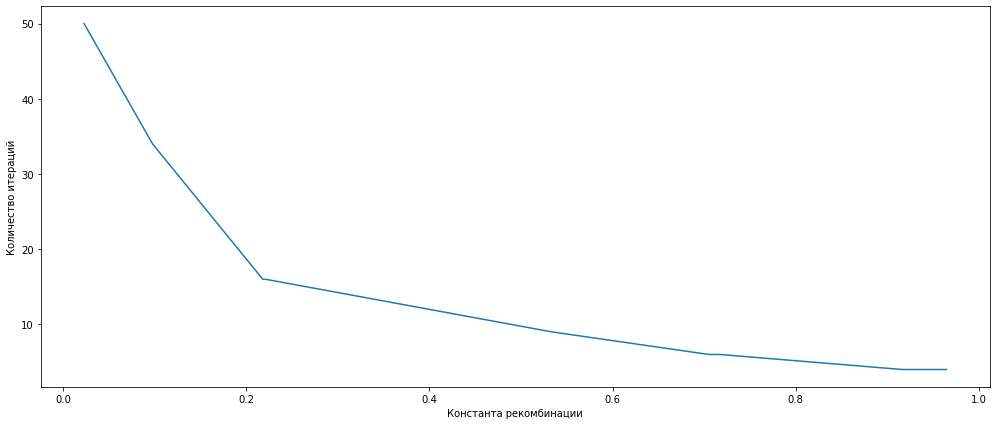

In [148]:
plt.plot(recombination, res_recombination)
plt.xlabel('Константа рекомбинации')
plt.ylabel('Количество итераций')

Чем выше константа рекомбенаций, тем меньше итераций

6. параметр updating. 'immediate','deferred'

In [144]:
updating = ['immediate','deferred']

In [150]:
res_updating = []

for i in updating:
    result = differential_evolution(rastrigin, bounds, seed=21, strategy='best1bin',popsize=10, tol=0.001, mutation=0.01,
                                   recombination=0.1, updating=i)
    res_updating.append(result.nit)

In [151]:
res_updating

[23, 29]

При immediate более быстрая сходимость